# Mandelbrot Set in Python - Single Thread

By: https://github.com/danyaal/mandelbrot

Adjusted for Python 3.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c

        if abs(z) > 4:
            break
            pass
        pass
    return iteration

In [53]:
# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas
# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density):
    # location and size of the atlas rectangle
    # realAxis = np.linspace(-2.25, 0.75, density)
    # imaginaryAxis = np.linspace(-1.5, 1.5, density)
    realAxis = np.linspace(-0.22, -0.219, 1000)
    imaginaryAxis = np.linspace(-0.70, -0.699, 1000)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)

    # 2-D array to represent mandelbrot atlas
    atlas = np.empty((realAxisLen, imaginaryAxisLen))

    print('realAxisLen: {}, imaginaryAxisLen: {}'.format(realAxisLen, imaginaryAxisLen))
    
    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)

            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass

    return atlas.T

def plot_mandelbrot(data):
        # plot and display mandelbrot set
        plt.imshow(data, interpolation="nearest")
        plt.show()


In [71]:
# Plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
%time data = mandelbrot(threshold=120, density=500)

realAxisLen: 1000, imaginaryAxisLen: 1000
CPU times: user 8.38 s, sys: 0 ns, total: 8.38 s
Wall time: 8.38 s


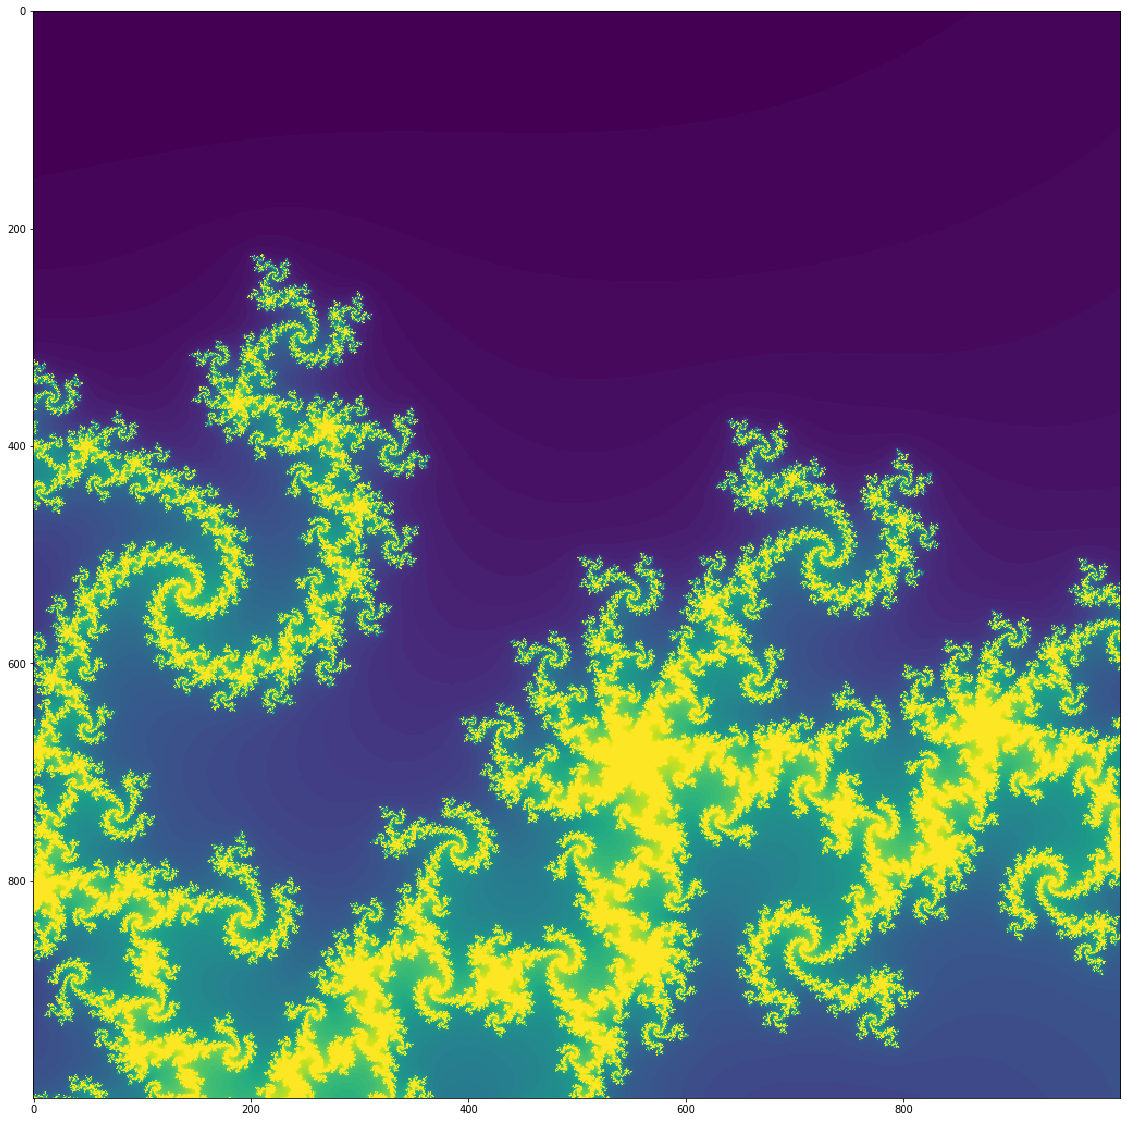

In [15]:
plot_mandelbrot(data)

# Mandelbrot Set in Python - Multithreaded


In [54]:
import multiprocessing as mp
import itertools

def calc_row(cx, cy, threshold=120):
    c = complex(cx[1], cy[1])
    return (cx[0], cy[0], countIterationsUntilDivergent(c, threshold))

def mandelbrot_multi(threshold, density, cpus=1):
    realAxis = np.linspace(-0.22, -0.219, 1000)
    imaginaryAxis = np.linspace(-0.70, -0.699, 1000)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)
    atlas = np.empty((realAxisLen, imaginaryAxisLen))
    
    # Create list of permutations
    realAxis = [(i,e ) for i,e in enumerate(realAxis)] 
    imaginaryAxis = [(i,e ) for i,e in enumerate(imaginaryAxis)] 

    paramlist = list(itertools.product(realAxis, imaginaryAxis))
    paramlist = list(map(lambda t: t + (threshold,),paramlist))
    
    # Create a multiprocessing pool
    pool = mp.Pool(cpus)
    
    n = pool.starmap(calc_row, paramlist)
    pool.close()
    pool.join()
    return n, atlas

def plot_mandelbrot_multi(data, atlas):
    # plot and display mandelbrot set
    for t in data:
        atlas[t[0], t[1]] = t[2]
    plt.imshow(atlas.T, interpolation="nearest")
    plt.show()

In [56]:
%time data, atlas = mandelbrot_multi(threshold=120, density=500, cpus=8)

CPU times: user 701 ms, sys: 156 ms, total: 857 ms
Wall time: 2.06 s


In [55]:
data[0]

((0, -0.22), (0, -0.7), 120)

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
plot_mandelbrot_multi(data, atlas)

NameError: name 'atlas' is not defined

# Plot Performance

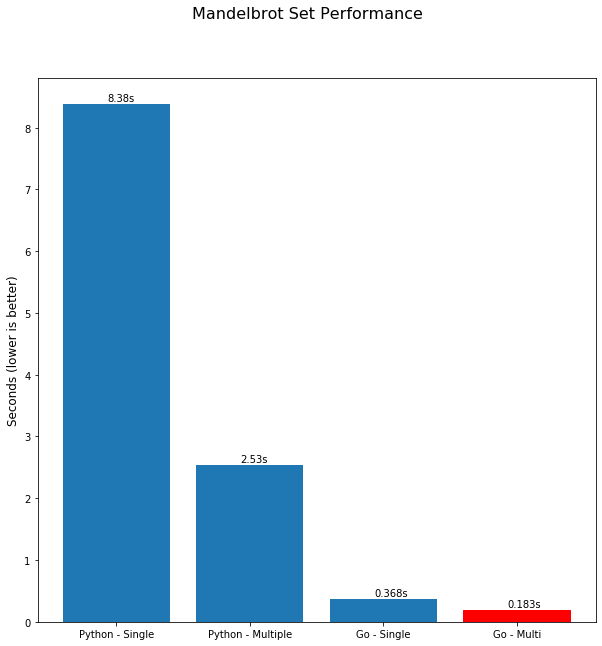

In [51]:
perf = { 
    'Python - Single': 8.38,
    'Python - Multiple': 2.53,
    'Go - Single': 0.368,
    'Go - Multi': 0.183
}
# Plot
fig, ax = plt.subplots()    
plt.rcParams["figure.figsize"] = (10,10)
bars = plt.bar(*zip(*perf.items()))
bars[3].set_color('r')
fig.suptitle('Mandelbrot Set Performance', fontsize=16)
plt.ylabel('Seconds (lower is better)', fontsize=12)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + .33, yval + .05, str(yval)+'s')
plt.show()


# Read Go Data

In [6]:
import matplotlib.pyplot as plt

In [12]:
data = np.loadtxt('../go/data.dat')

In [13]:
def plot_mandelbrot(data):
        # plot and display mandelbrot set
        plt.imshow(data, interpolation="nearest")
        plt.show()

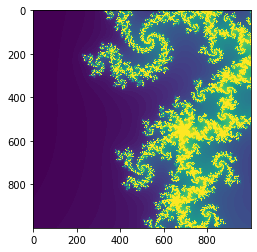

In [14]:
plot_mandelbrot(data)